# Case Study - Car Price Prediction

**Problem Type** : This is **supervised and regression problem** because we have both features and lables and we want to predict car price which is continuous value.

The followings describe the features.

**Categorical Features**

- **name**: Detail description of car's brand & model
- **fuel**: Fuel type in 'Diesel','Petrol','CNG' and 'LPG'
- **seller_type**: Seller types in 'Individual', 'Dealer' and 'Trustmark Dealer'
- **transmission**: Car's gearbox types in 'Manual' and 'Automatic'
- **owner**: Car's owner type in 'First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner' and 'Test Drive Car'

**Continuous Features**
- **year**: Release year of the car's model
- **km_driven**: How much distance (in kilometres) the car had travelled.
- **mileage**: How many miles the vehicle runs per liter of fuel
- **engine**: Engine power of the car
- **max_power**: The maximum power available of the car
- **torque**: The measurement of car's ability
- **seats**: No of seats in each car

**Labels**
- **selling_price**: Car's selling price

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

## 1. Load data

In [3]:
# df = pd.read_csv('/root/source_code/raw_data/Cars.csv')
df = pd.read_csv('C:/AIT/FirstSem/ML/Assignment/A2/A2_Car_Price_Prediction/Source_Code/raw_data/Cars.csv')

In [4]:
# Keeping original dataframe
df_org = df
# Add feture driven for later use in inference testing
from datetime import datetime
df_org['car_age'] = (datetime.now().year) - df_org['year']

In [5]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16


In [6]:
# print the shape of data
df.shape

(8128, 14)

In [7]:
# Statistical info
df.describe()

,year,selling_price,km_driven,seats,car_age
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719,9.195989
std,4.044249,8.062534e+05,5.655055e+04,0.959588,4.044249
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,3.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,6.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,8.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000,12.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,40.000000


In [8]:
# Check Dtypes of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  car_age        8128 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 889.1+ KB


## 2. Exploratory Data Analysis

### Renaming

Rename 'name' column into 'brand'.

In [9]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'car_age'],
      dtype='object')

In [10]:
df.rename(columns = {'name':'brand'}, inplace = True)

In [11]:
# Check the column names after renaming
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'car_age'],
      dtype='object')

In [12]:
# Get the car brand only from name

df['brand'] = df['brand'].str.split(' ', expand=True)[0]

In [13]:
# Check record count by each brand
df.brand.value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

Remove all rows with CNG and LPG fuel type because CNG and LPG use a different mileage system.

In [14]:
# Check records count in 'fuel'
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [15]:
# Remove 'CNG' and 'LPG' record count from data set
exc_fuel = df[ (df['fuel'] == 'CNG') | (df['fuel'] == 'LPG') ].index
df.drop(exc_fuel , inplace=True)

In [16]:
# Check again fuel records count to make sure there is no record related to 'CNG' or 'LPG'
df.fuel.value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

Remove mileage unit of 'kmpl' to get mileage number only

In [17]:
df['mileage'] = df['mileage'].str.split(' ', expand=True)[0].astype(float)

Remove engine unit of 'CC' to get number value only

In [18]:
df['engine'] = df['engine'].str.split(' ', expand=True)[0].astype(float)

Remove max_power unit to get number value only

In [19]:
var_value = df['max_power'].str.split(' ', expand=True)[0]
var_value_2 = [None if isinstance(value, str) and value.isalpha() else float(value) for value in var_value]
df['max_power'] = var_value_2

Drop 'Torque' feature as not clearly understanding of the value

In [20]:
df = df.drop('torque', axis=1)

Delete all sample records of 'Test Drive Cars'

In [21]:
# Check records count in 'Owner'
df.owner.value_counts()

First Owner             5238
Second Owner            2073
Third Owner              547
Fourth & Above Owner     170
Test Drive Car             5
Name: owner, dtype: int64

In [22]:
# Checking total count, mean, min, max
df.selling_price.count(),df.selling_price.mean(),df.selling_price.max(),df.selling_price.min()

(8033, 642736.1205029255, 10000000, 29999)

In [23]:
# Checking total count, mean, min, max of 'Test Drive Car'
var_testcar = df['owner'] == 'Test Drive Car'
df[var_testcar].selling_price.count(),df[var_testcar].selling_price.mean(),df[var_testcar].selling_price.max(),df[var_testcar].selling_price.min()

(5, 4403800.0, 6523000, 1350000)

In [24]:
# Checking total count, mean, min, max of non 'Test Drive Car'
var_no_testcar = df['owner'] != 'Test Drive Car'
df[var_no_testcar].selling_price.count(),df[var_no_testcar].selling_price.mean(),df[var_no_testcar].selling_price.max(),df[var_no_testcar].selling_price.min()

(8028, 640393.6542102641, 10000000, 29999)

In [25]:
# Remove 'Test Drive Car'
exc_owner = df[df['owner'] == 'Test Drive Car'].index
df.drop(exc_owner , inplace=True)

In [26]:
# Check again owner records count to make sure there is no record related to 'Test Drive Car'
df.owner.value_counts()

First Owner             5238
Second Owner            2073
Third Owner              547
Fourth & Above Owner     170
Name: owner, dtype: int64

In [27]:
# Check number of car by seller_type
df.seller_type.value_counts()

Individual          6673
Dealer              1119
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [28]:
# Check number of car by transmission type
df.transmission.value_counts()

Manual       6982
Automatic    1046
Name: transmission, dtype: int64

#### Feature driven of 'car_age' from 'year'

In [29]:
from datetime import datetime
df['car_age'] = (datetime.now().year) - df['year']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   object 
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
 12  car_age        8028 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 878.1+ KB


In [31]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16


In [32]:
# Statistical information
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,car_age
count,8028.000000,8.028000e+03,8.028000e+03,7814.000000,7814.000000,7820.000000,7814.000000,8028.000000
mean,2013.815521,6.403937e+05,6.977314e+04,19.391962,1462.914640,91.819726,5.421551,9.184479
std,4.030836,8.027015e+05,5.664419e+04,4.001972,504.759742,35.804513,0.963125,4.030836
min,1983.000000,2.999900e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000,3.000000
25%,2011.000000,2.600000e+05,3.500000e+04,16.780000,1197.000000,68.850000,5.000000,6.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.400000,5.000000,8.000000
75%,2017.000000,6.800000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,12.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,40.000000


### 2.1 Univariate analyis

Single variable exploratory data anlaysis

#### Countplot

<Axes: xlabel='brand', ylabel='count'>

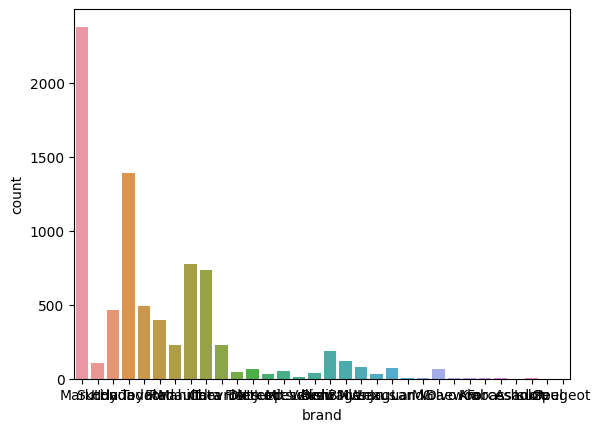

In [33]:
sns.countplot(data = df, x = 'brand')

<Axes: xlabel='fuel', ylabel='count'>

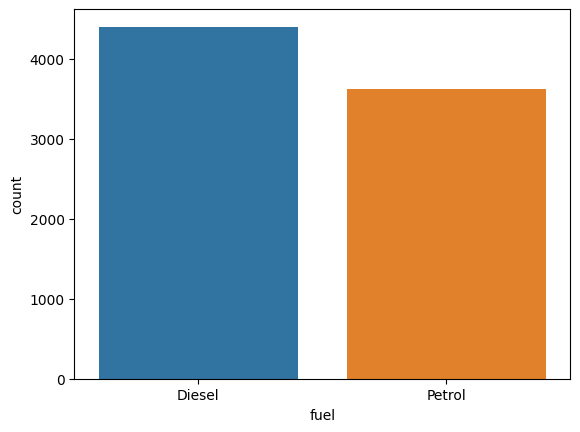

In [34]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

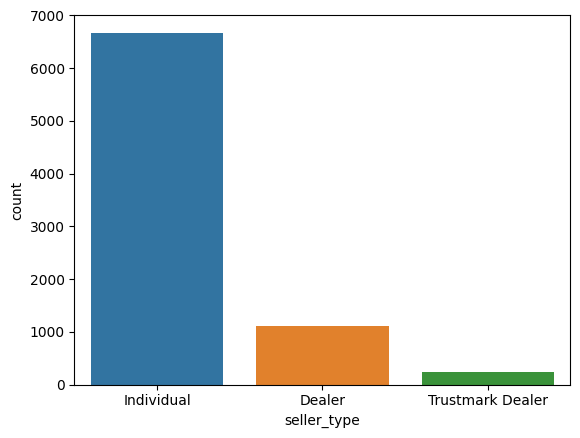

In [35]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

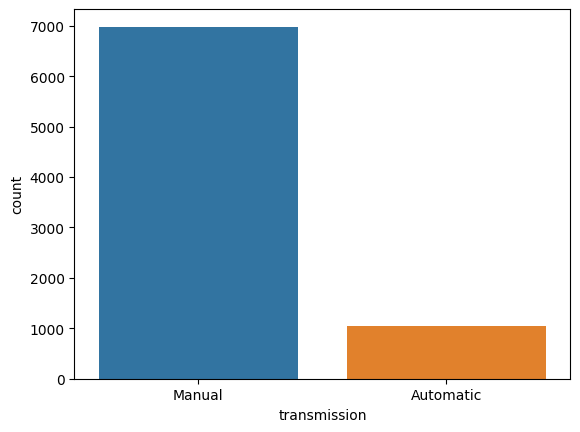

In [36]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='owner', ylabel='count'>

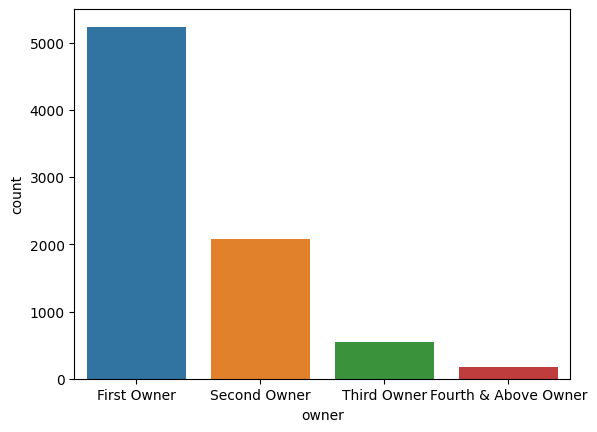

In [37]:
sns.countplot(data = df, x = 'owner')

<Axes: xlabel='seats', ylabel='count'>

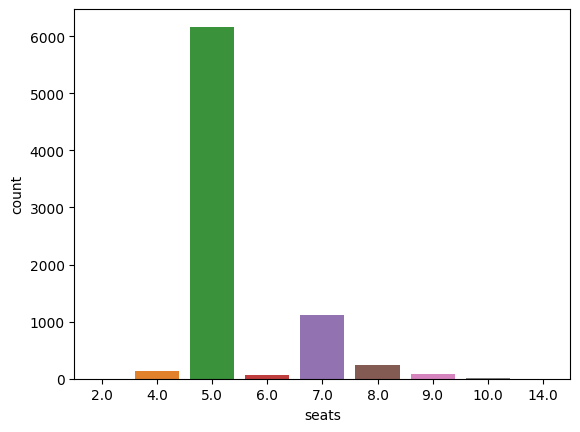

In [38]:
sns.countplot(data = df, x = 'seats')

#### Distribution plot

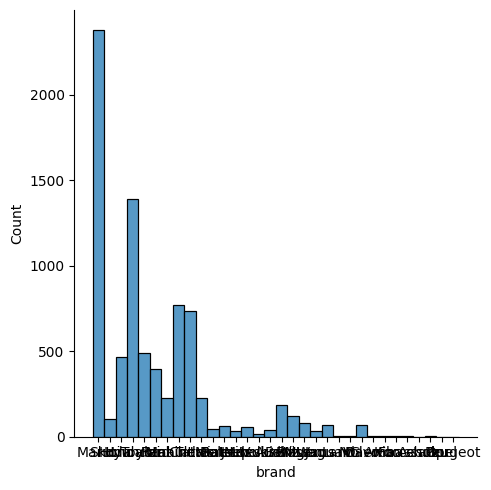

In [39]:
sns.displot(data = df, x = 'brand')

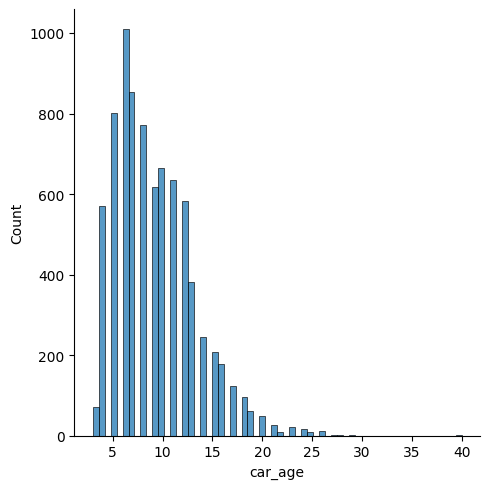

In [40]:
sns.displot(data = df, x = 'car_age')

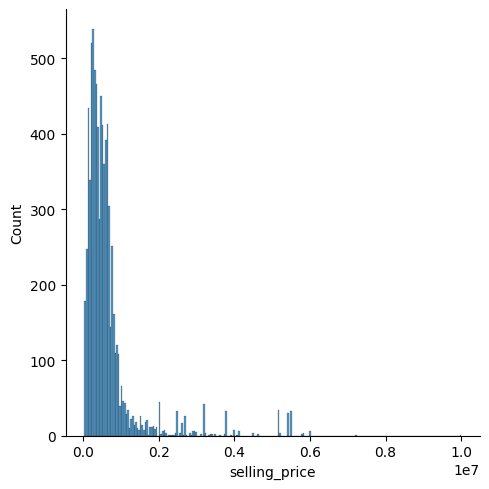

In [41]:
sns.displot(data = df, x = 'selling_price')

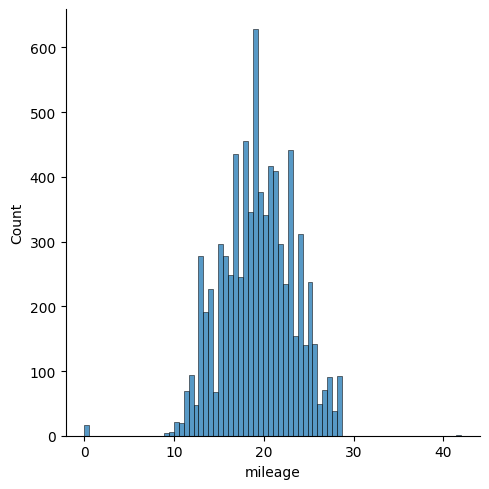

In [42]:
sns.displot(data = df, x = 'mileage')

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

Text(0, 0.5, 'Selling Price')

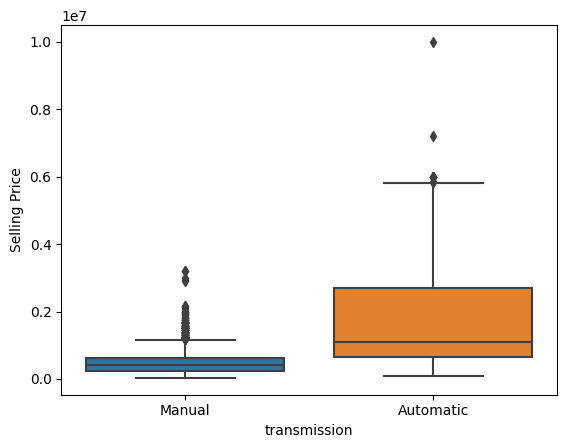

In [43]:
sns.boxplot(x = df["transmission"], y = df["selling_price"]);
plt.xlabel("transmission")
plt.ylabel("Selling Price")

Text(0, 0.5, 'Selling Price')

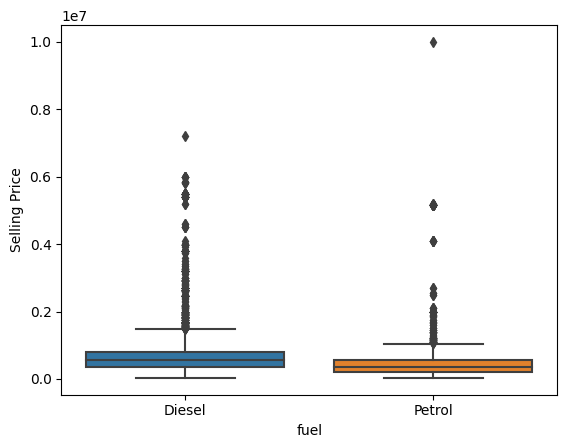

In [44]:
sns.boxplot(x = df["fuel"], y = df["selling_price"]);
plt.xlabel("fuel")
plt.ylabel("Selling Price")

Text(0, 0.5, 'Selling Price')

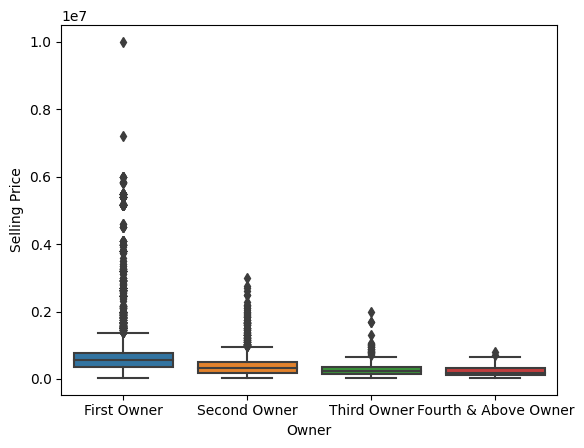

In [45]:
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.xlabel("Owner")
plt.ylabel("Selling Price")

#### Scatterplot

<Axes: xlabel='brand', ylabel='selling_price'>

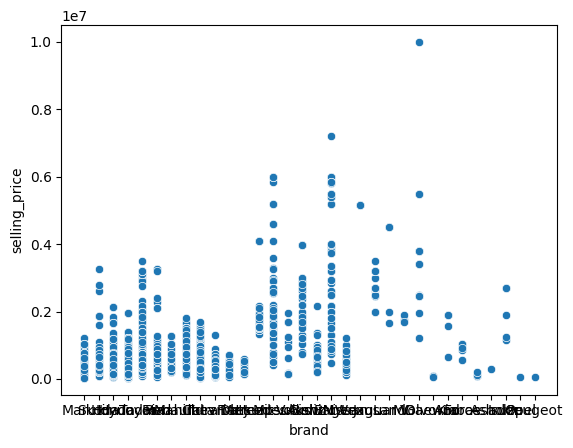

In [46]:
sns.scatterplot(x = df['brand'], y = df['selling_price'])

<Axes: xlabel='max_power', ylabel='selling_price'>

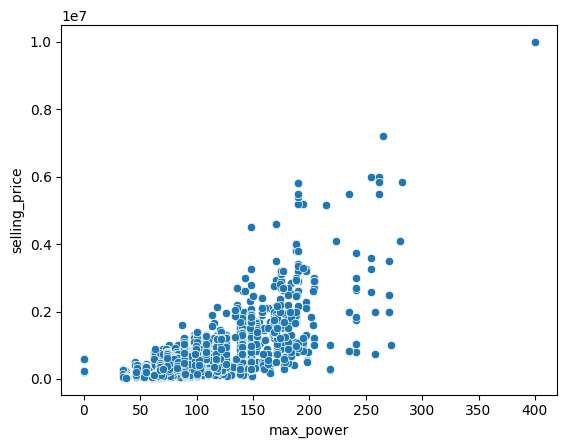

In [47]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'])

<Axes: xlabel='engine', ylabel='selling_price'>

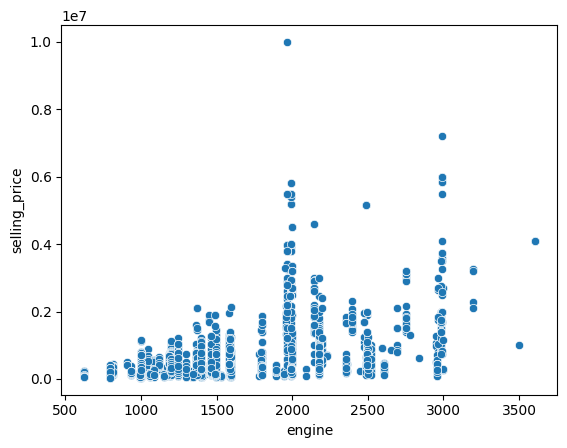

In [48]:
sns.scatterplot(x = df['engine'], y = df['selling_price'])

<Axes: xlabel='mileage', ylabel='selling_price'>

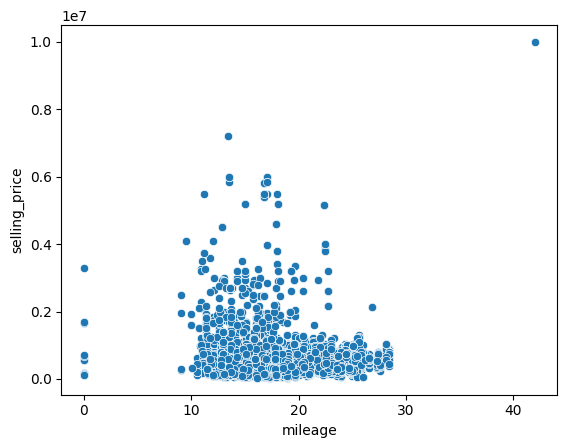

In [49]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

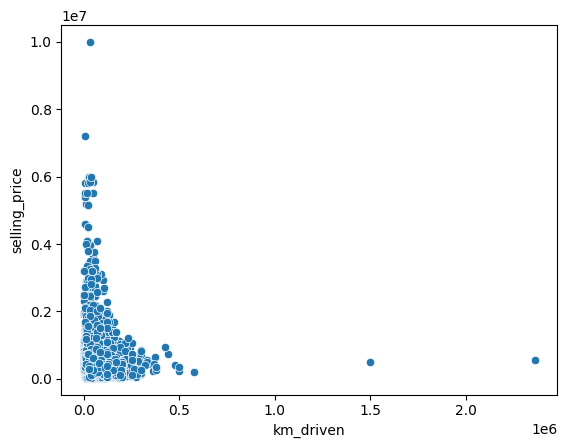

In [50]:
sns.scatterplot(x = df['km_driven'], y = df['selling_price'])

<Axes: xlabel='car_age', ylabel='selling_price'>

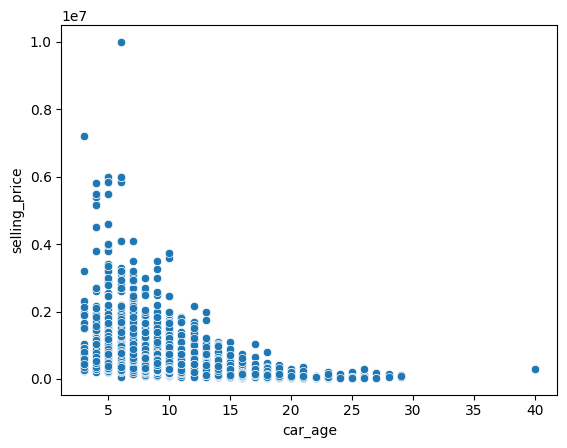

In [51]:
sns.scatterplot(x = df['car_age'], y = df['selling_price'])

<Axes: xlabel='car_age', ylabel='selling_price'>

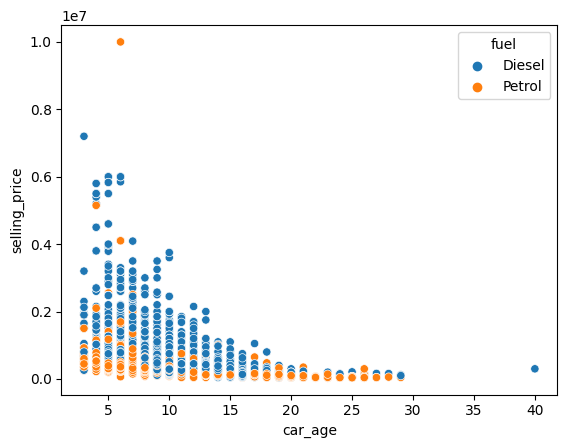

In [52]:
sns.scatterplot(x = df['car_age'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='transmission', ylabel='selling_price'>

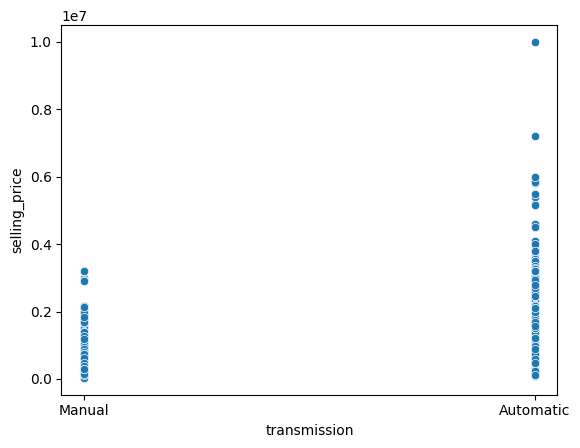

In [53]:
sns.scatterplot(x = df['transmission'], y = df['selling_price'])

<Axes: xlabel='car_age', ylabel='selling_price'>

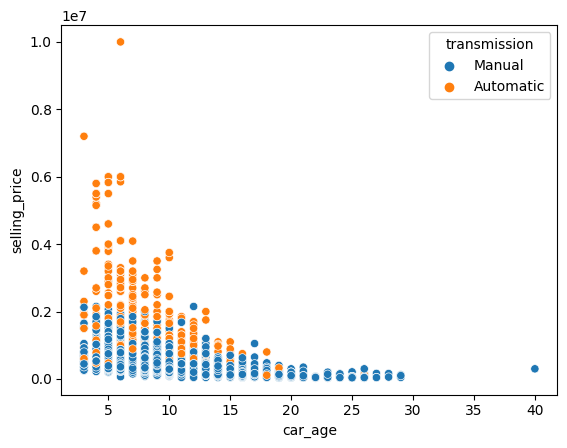

In [54]:
sns.scatterplot(x = df['car_age'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

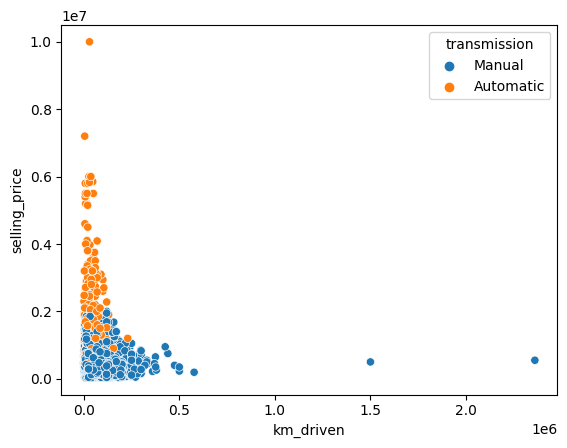

In [55]:
sns.scatterplot(x = df['km_driven'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='mileage', ylabel='selling_price'>

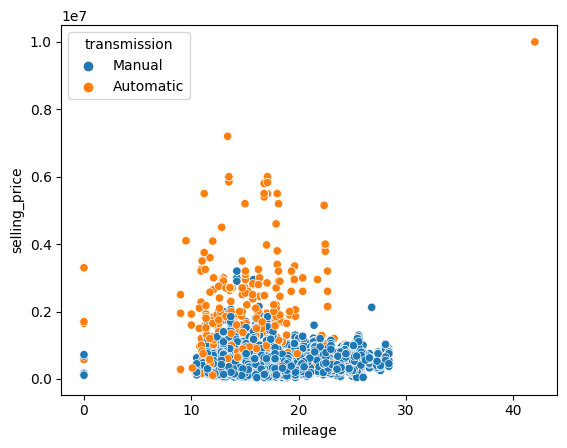

In [56]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='mileage', ylabel='selling_price'>

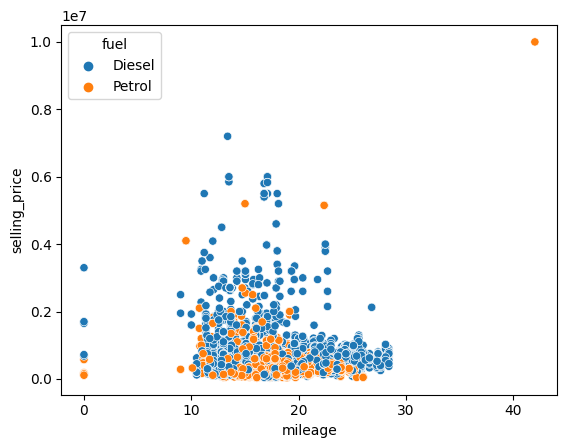

In [57]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='mileage', ylabel='selling_price'>

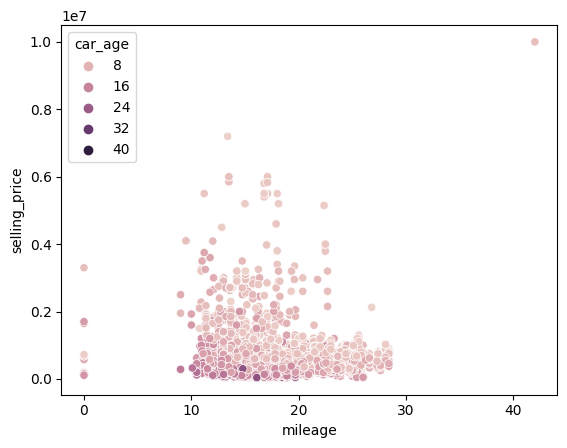

In [58]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['car_age'])

<Axes: xlabel='max_power', ylabel='selling_price'>

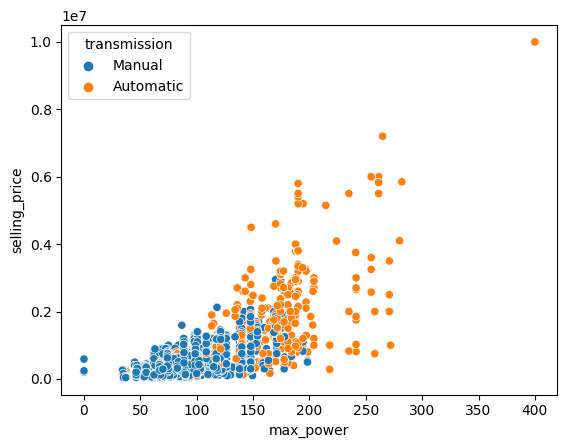

In [59]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='max_power', ylabel='selling_price'>

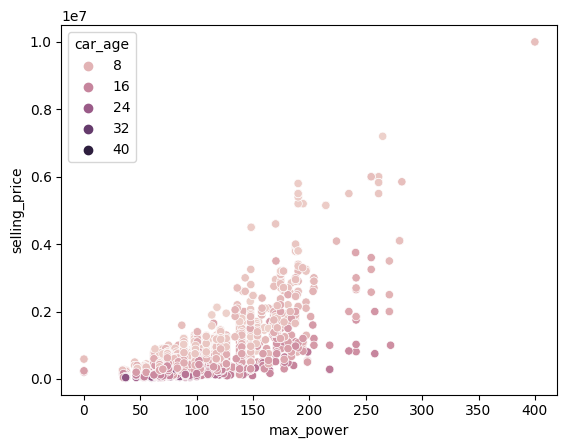

In [60]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['car_age'])

<Axes: xlabel='max_power', ylabel='selling_price'>

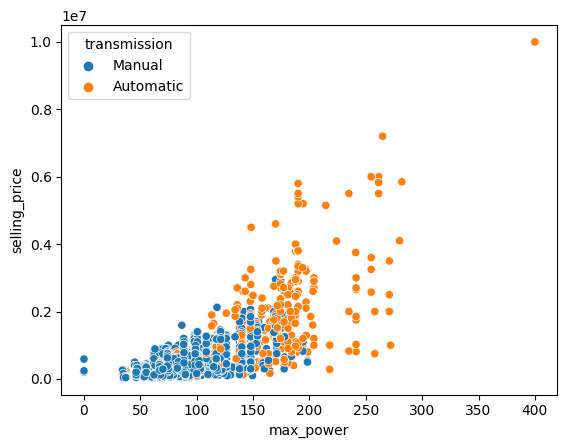

In [61]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='brand', ylabel='selling_price'>

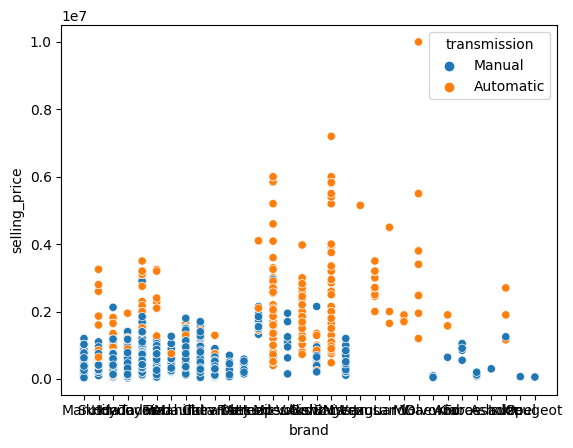

In [62]:
sns.scatterplot(x = df['brand'], y = df['selling_price'], hue=df['transmission'])

In [63]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16


#### Correlation Matrix checking before label encoding to object features

<Axes: >

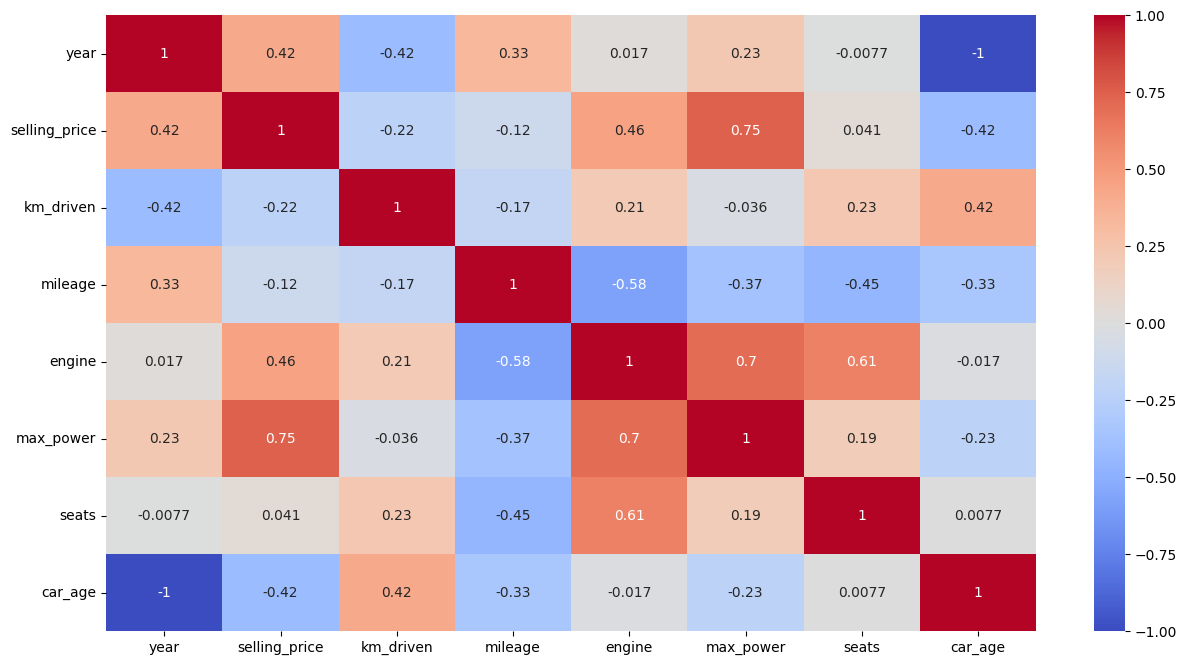

In [64]:
plt.figure(figsize = (15,8))
my_df = df.select_dtypes(exclude = [object])
sns.heatmap(my_df.corr(),annot=True,cmap="coolwarm")

#### Predictive Power Score

In [65]:
# stop here

In [66]:
import ppscore as pps

<Axes: xlabel='x', ylabel='y'>

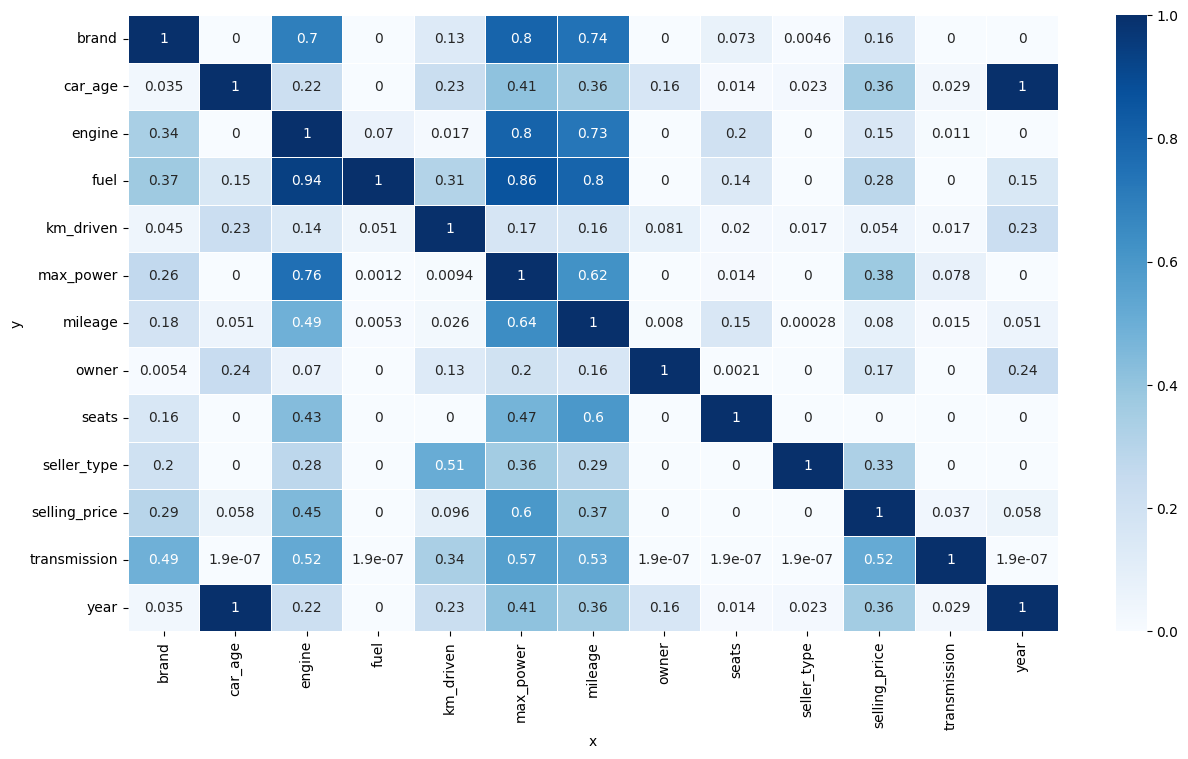

In [67]:
# Check features correlation with ppscore
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

#### Label encoding for features

In [68]:
# Checking value count for Owner
df.owner.value_counts()

First Owner             5238
Second Owner            2073
Third Owner              547
Fourth & Above Owner     170
Name: owner, dtype: int64

In [69]:
# Label encoding for 'owner'
df['owner'] = df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

In [70]:
# Check label encoding value for 'owner'
df.owner.value_counts()

1    5238
2    2073
3     547
4     170
Name: owner, dtype: int64

In [71]:
# Label encoding for 'Transmission'
from sklearn.preprocessing import LabelEncoder

# keep original value of 'Transmission'
df["transmission_org"] = df["transmission"]

le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

df["transmission"].unique()

array([1, 0])

In [72]:
# Check label encode mapping
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [73]:
# Label encoding for 'Fuel'
from sklearn.preprocessing import LabelEncoder

# keep original value of 'Transmission'
df["fuel_org"] = df["fuel"]

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()

array([0, 1])

In [74]:
# Check label encode mapping
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [75]:
# Check data set values after label encoding
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,transmission_org,fuel_org
0,Maruti,2014,450000,145500,0,Individual,1,1,23.40,1248.0,74.00,5.0,9,Manual,Diesel
1,Skoda,2014,370000,120000,0,Individual,1,2,21.14,1498.0,103.52,5.0,9,Manual,Diesel
2,Honda,2006,158000,140000,1,Individual,1,3,17.70,1497.0,78.00,5.0,17,Manual,Petrol
3,Hyundai,2010,225000,127000,0,Individual,1,1,23.00,1396.0,90.00,5.0,13,Manual,Diesel
4,Maruti,2007,130000,120000,1,Individual,1,1,16.10,1298.0,88.20,5.0,16,Manual,Petrol


<Axes: >

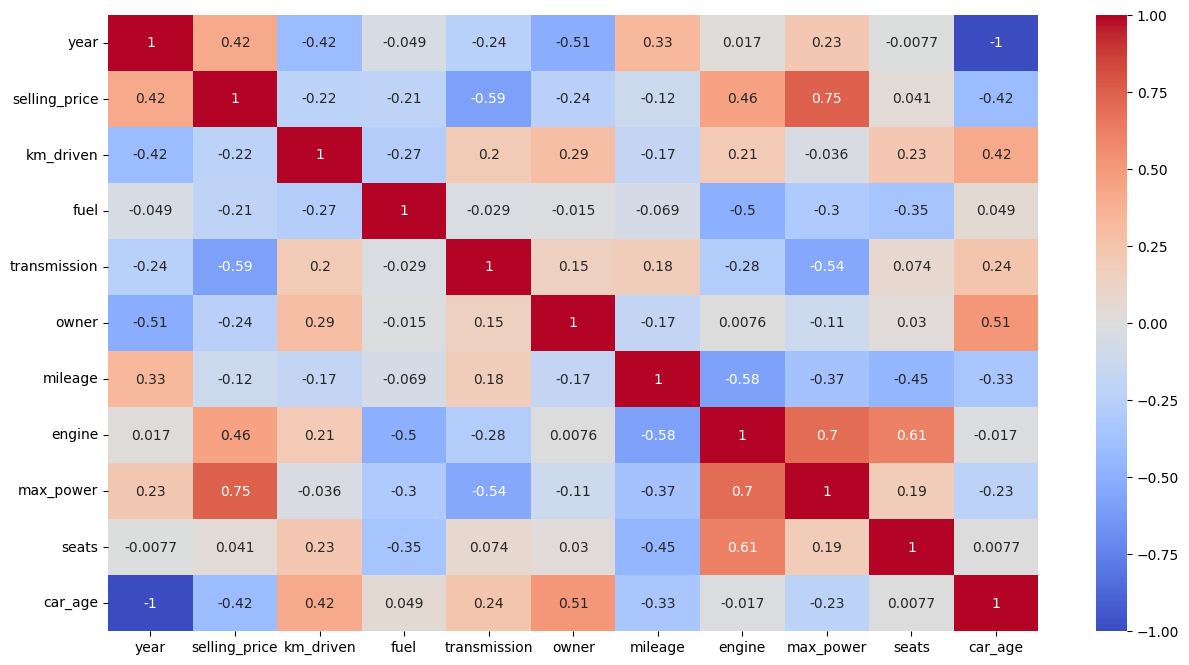

In [76]:
# Check with heatmap again including label encoded columns
plt.figure(figsize = (15,8))
my_df = df.select_dtypes(exclude = [object])
sns.heatmap(my_df.corr(),annot=True,cmap="coolwarm")

<Axes: xlabel='x', ylabel='y'>

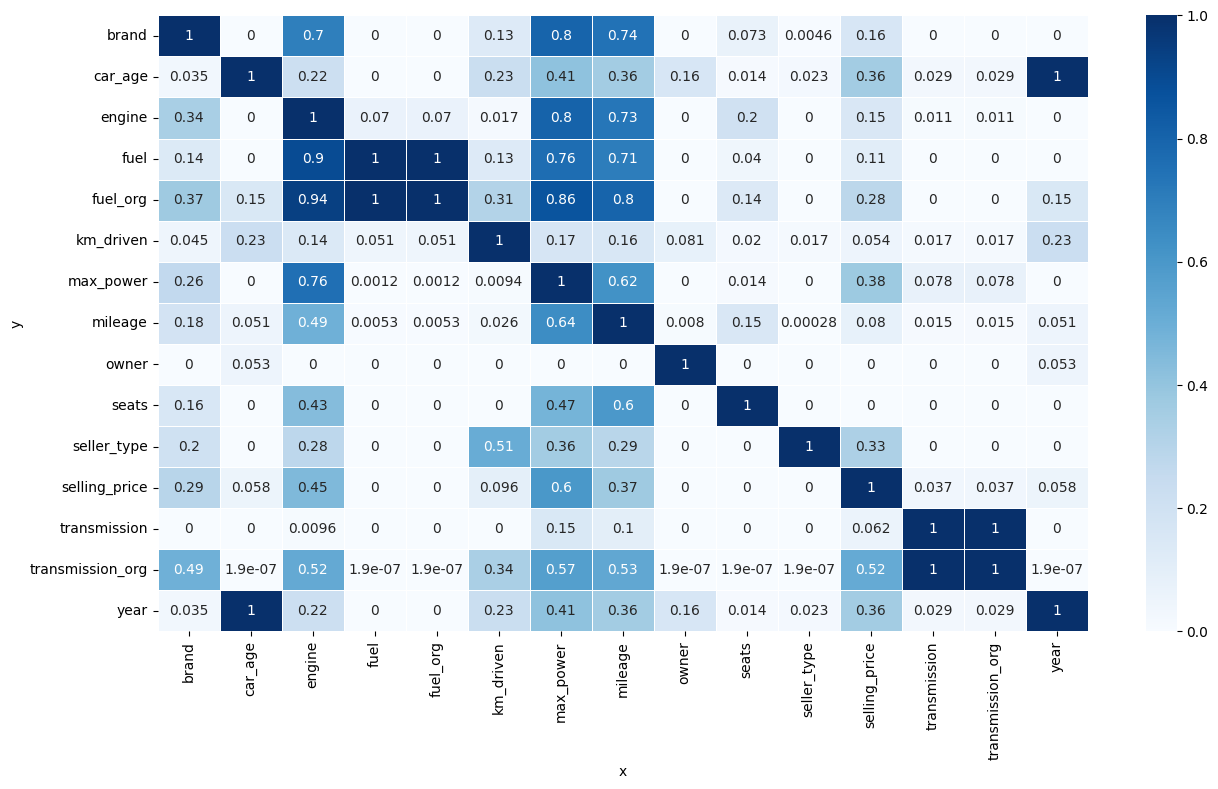

In [77]:
# Check feture correlation again including label encoded features
import ppscore as pps

matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4. Feature selection

In [78]:
# choosen features
# max_power,car_age,mileage

#x is our strong features
X = df[        ['max_power', 'car_age', 'mileage']        ]

# define y
y = df['selling_price']

In [79]:
print(X.shape) #2d (no of samples, no of features)
print(y.shape) #1d (no of samples)

(8028, 3)
(8028,)


### Train test split

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 72)

In [81]:
print(X_train.shape) #2d (no of samples, no of features)
print(X_test.shape) #2d (no of samples, no of features)
print(y_train.shape) #1d (no of samples)
print(y_test.shape) #1d (no of samples)

(5619, 3)
(2409, 3)
(5619,)
(2409,)


## 5. Preprocessing

### Null values checking

In [82]:
#check for null values
X_train[['max_power', 'car_age', 'mileage']].isna().sum()

max_power    148
car_age        0
mileage      151
dtype: int64

In [83]:
X_test[['max_power', 'car_age', 'mileage']].isna().sum()

max_power    60
car_age       0
mileage      63
dtype: int64

In [84]:
y_train.isna().sum()

0

In [85]:
y_test.isna().sum()

0

### Fill Null value with mean or median

### Prepossing for 'max_power'

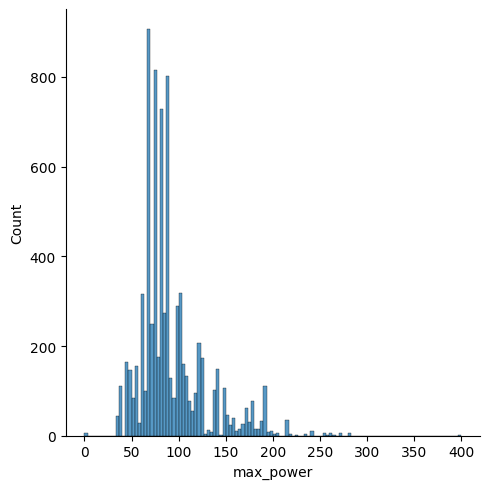

In [86]:
sns.displot(data=df, x='max_power')

In [87]:
# Cheking mean, median value to fill up the Null value of max_power
df['max_power'].mean(), df['max_power'].median()

(91.8197257033248, 82.4)

In [88]:
# Fill the max_power null values with median because data seem left skewed.
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [89]:
# Fill to testing data.
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

### Prepossing for 'milage'

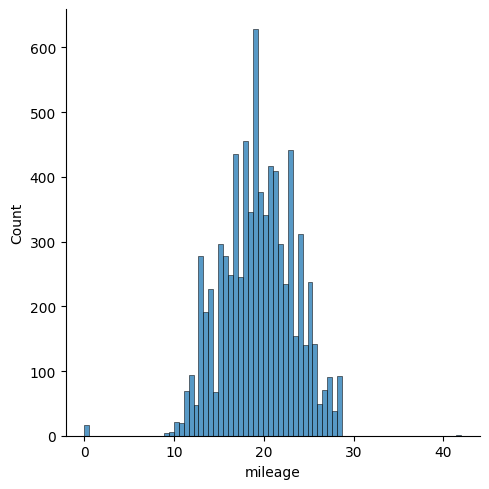

In [90]:
sns.displot(data=df, x='mileage')

In [91]:
# Cheking mean, median value to fill up the Null value mileage
df['mileage'].mean(), df['mileage'].median()

(19.391961863322244, 19.3)

In [92]:
# Fill the null values of max_power with mean because data seem normal distribution
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [93]:
# Fill the testing data
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

### Check Null values again after prepossing

In [94]:
X_train[['max_power', 'car_age', 'mileage']].isna().sum()

max_power    0
car_age      0
mileage      0
dtype: int64

In [95]:
# check null value in testing data
X_test[['max_power', 'car_age', 'mileage']].isna().sum()

max_power    0
car_age      0
mileage      0
dtype: int64

In [96]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking Outliers

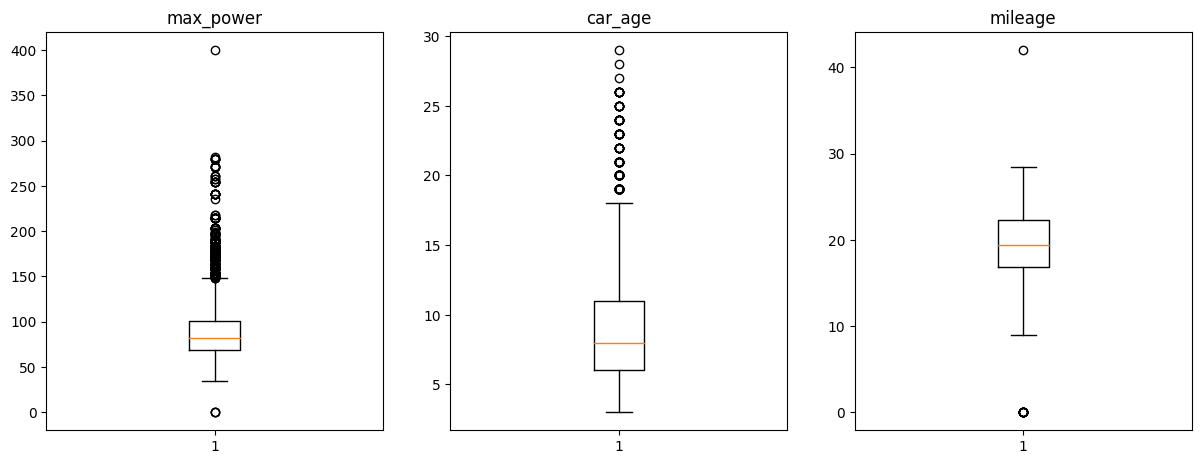

In [97]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'car_age':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [98]:
def outlier_count(col, data = X_train):

    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])

    # calculate your inter quatile
    iqr = q75 - q25

    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [99]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 433
Percent of data that is outlier: 7.71%

---------------car_age---------------

Number of outliers: 154
Percent of data that is outlier: 2.74%

---------------mileage---------------

Number of outliers: 13
Percent of data that is outlier: 0.23%


Outlier % seems low except max_power.

### Scaling

In [100]:
from sklearn.preprocessing import StandardScaler

# feature scaling for X features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [101]:
from sklearn.preprocessing import StandardScaler

# feature scaling for y feature
y_train = np.log(y_train)
y_test  = np.log(y_test)

In [102]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6. Modeling

In [103]:
X_train.shape

(5619, 3)

In [104]:
y_train.shape

(5619,)

In [105]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
# os.environ["LOGNAME"] = "chaky"

# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
# mlflow.set_experiment(experiment_name="chaky-diabetes-example")

os.environ["LOGNAME"] = "wutyee"
# mlflow.create_experiment(name="wutyee-carprice-prediction-2")
mlflow.set_experiment(experiment_name="wutyee-carprice-prediction-2")

<Experiment: artifact_location='mlflow-artifacts:/456971797692647225', creation_time=1694762639044, experiment_id='456971797692647225', last_update_time=1694762639044, lifecycle_stage='active', name='wutyee-carprice-prediction-2', tags={}>

In [106]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
    
    def __init__(self, regularization, init_weights, use_momentum, momentum, degree, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold):
        
        
        self.lr             = lr
        self.num_epochs     = num_epochs
        self.batch_size     = batch_size
        self.method         = method
        self.cv             = cv
        self.regularization = regularization
        self.init_weights   = init_weights
        self.use_momentum   = use_momentum
        self.momentum       = momentum
        self.prev_step      = 0.0
        self.degree         = degree  # Degree for polynomial features
        self.poly           = PolynomialFeatures(degree=degree, include_bias=False)  # Initialize PolynomialFeatures
    
    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ypred.shape[0]
    
    def r2(self, ytrue, ypred):
        rss = sum((ytrue - ypred) ** 2)
        y_mean = sum(ytrue) / len(ytrue)
        tss = sum((ytrue - y_mean) ** 2)
        r2 = 1 - (rss / tss)
        return r2
    
    def fit(self, X_train, y_train):
        
        # Check if polynomial features should be applied
        if self.degree > 1:
            X_train_poly = self.poly.fit_transform(X_train)
        else:
            X_train_poly = X_train
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        #5 splits
        #
        # for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train_poly)):
            
            
            # X_cross_train = X_train[train_idx]
            X_cross_train = X_train_poly[train_idx]
            y_cross_train = y_train[train_idx]
            # X_cross_val   = X_train[val_idx]
            X_cross_val   = X_train_poly[val_idx]
            y_cross_val   = y_train[val_idx]
            
            if self.init_weights == 'zeros':
                self.theta = np.zeros(X_cross_train.shape[1])
            elif self.init_weights == 'xavier':
                xavier_stddev = np.sqrt(2.0 / (X_cross_train.shape[1] + 1))
                self.theta = np.random.normal(0, xavier_stddev, X_cross_train.shape[1])
            else:
                raise ValueError("Invalid weight initialization method: " + self.init_weights)
            
            # self.theta = np.zeros(X_cross_train.shape[1])
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                
                # mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                    
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    
                    perm = np.random.permutation(X_cross_train.shape[0])

                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)
                    

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #record dataset
                    # mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    # mlflow.log_input(mlflow_train_data, context="training")
                    
                    # mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    # mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
                    
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        step = self.lr * grad
        
        if self.use_momentum == 'Yes':
            step += self.momentum * self.prev_step
        
        self.theta = self.theta - step
        self.prev_step = step
        return self.mse(y, yhat)
    
    def predict(self, X):    
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def plot_feature_importance(self, X):
        if not hasattr(self, 'theta'):
            raise ValueError("Model has not been trained yet. Call the 'fit' method first.")

        # Ensure feature_names matches the number of coefficients
        if X.shape[1] != self.theta.shape[0]:
        # if len(feature_names) != len(self.theta):
            raise ValueError("Number of feature names should match the number of coefficients.")

        feature_names = X.columns.tolist()
        
        feature_importance = np.abs(self.theta.squeeze())

        # Plot the feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance)
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance')
        plt.gca().invert_yaxis()
        plt.show()

In [107]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class NormalPenalty:
    
    def __init__(self):
        pass

    def derivation(self, theta):
        return theta  # A default 'do nothing' derivation method
    
class Lasso(LinearRegression):
    
    def __init__(self, method, init_weights, use_momentum, momentum, degree, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, init_weights, use_momentum, momentum, degree, lr, method)
        
class Ridge(LinearRegression):
    def __init__(self, method, init_weights, use_momentum, momentum, degree, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, init_weights, use_momentum, momentum, degree, lr, method)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, init_weights, use_momentum, momentum, degree, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, init_weights, use_momentum, momentum, degree, lr, method)
        
class Normal(LinearRegression):
    # self, regularization, init_weights, use_momentum, momentum, degree, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold
    def __init__(self, method, init_weights, use_momentum, momentum, degree, lr):
        self.regularization = NormalPenalty()
        super().__init__(self.regularization, init_weights, use_momentum, momentum, degree, lr, method)

In [108]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

**Experiment**

In [ ]:
# stop here

**Test run for Model**

In [115]:
# regs = ["Ridge", "Lasso", "Normal"] # ElasticNet,"LinearRegression"
# learing_rates = [0.0001,0.001]
# methods = ["sto","mini","batch"]
# init_weights = ["zeros","xavier"]
# use_momentums = ["Yes","No"]
# degrees = [1]


regs = ["Ridge","Lasso", "Normal"]


for reg in regs:


    use_poly = 'No'
    degree = 1
    
    if reg == "Normal":
        # params = {"method": "sto", "init_weights": "zeros", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001}
        # params = {"method": "mini", "init_weights": "zeros", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001}
        # params = {"method": "batch", "init_weights": "zeros", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001}
        
        # params = {"method": "sto", "init_weights": "xavier", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001}
        # params = {"method": "mini", "init_weights": "xavier", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001}
        params = {"method": "batch", "init_weights": "xavier", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001}
    else:
        # params = {"method": "sto", "init_weights": "zeros", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001, "l": 0.1}
        # params = {"method": "mini", "init_weights": "zeros", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001, "l": 0.1}
        # params = {"method": "batch", "init_weights": "zeros", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001, "l": 0.1}
        
        # params = {"method": "sto", "init_weights": "xavier", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001, "l": 0.1}
        # params = {"method": "mini", "init_weights": "xavier", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001, "l": 0.1}
        params = {"method": "batch", "init_weights": "xavier", "use_momentum": "Yes", "momentum": 0.5,"degree" : degree, "lr": 0.0001, "l": 0.1}
        
                
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
    mlflow.log_params(params=params)
    
    print("="*5, reg, "="*5)

    # #######
        
    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
    model = type_of_regression(**params)
    
    model.fit(X_train, y_train.values)

    # if use_poly == 'Yes':
    #     poly_x_test = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X_test)
    # else:
    #     poly_x_test = X_test
    
    # yhat = model.predict(poly_x_test)
    # mse  = model.mse(y_test, yhat)
    # r2   = model.r2(y_test, yhat)
        
    if use_poly == 'Yes':
        poly_x_train = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X_train)
    else:
        poly_x_train = X_train
        
    yhat = model.predict(poly_x_train)
    
    mse  = model.mse(y_train, yhat)
    r2   = model.r2(y_train, yhat)

    print("Test MSE: ", mse)
    print("Test R2: ", r2)
    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    # #######

    mlflow.end_run()

===== Ridge =====
Fold 0: 169.00976189757705
Fold 1: 169.2427663972718
Fold 2: 168.4884037778621
Test MSE:  168.9522582657174
Test R2:  -242.35285293830322
===== Lasso =====
Fold 0: 168.59391454372903
Fold 1: 170.31972787820035
Fold 2: 169.4066461228504
Test MSE:  169.93106797946052
Test R2:  -243.76269580615417
===== Normal =====
Fold 0: 169.66749736677164
Fold 1: 170.29234790390066
Fold 2: 170.2242671528059
Test MSE:  169.90562242755308
Test R2:  -243.72604493380211


In [113]:
regs = ["Ridge", "Lasso", "Normal"] # ElasticNet,"LinearRegression"
learing_rates = [0.0001,0.001]
methods = ["sto","mini","batch"]
init_weights = ["zeros","xavier"]
use_momentums = ["Yes","No"]
degrees = [1]

for reg in regs:
    
    for mth in methods:
    
        for theta in init_weights:
            
            for momem in use_momentums:
                
                for lr in learing_rates:
                    
                    for poly in degrees:
                        
                        if reg == "Normal":
                            params = {"method": mth, "init_weights": theta, "use_momentum": momem, "momentum": 0.5,"degree" : poly, "lr": lr}
                            # params = {"method": "sto","lr": 0.0001,"l": 0.1,"init_weights": "zeros","use_momentum": "No","momentum": 0.5,"degree": 1}
                        else:
                            params = {"method": mth, "init_weights": theta, "use_momentum": momem, "momentum": 0.5,"degree" : poly, "lr": lr, "l": 0.1}
                        
                        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
                                                
                        mlflow.log_params(params=params)
                        
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)
                        
                        print("="*5, reg, "="*5)

                        # #######
                        # type_of_regression = str_to_class(reg)
                        # model = type_of_regression(**params)
                        
                        model.fit(X_train, y_train.values)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######

                        mlflow.end_run()

2023/09/15 13:08:45 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



===== Ridge =====
Fold 0: 168.81459830379276
Fold 1: 169.28000731051634
Fold 2: 168.43523496091464
Test MSE:  168.84948094137334
Test R2:  -233.26675387668186
===== Ridge =====
Fold 0: 168.7916040692307
Fold 1: 169.33294073238616
Fold 2: 169.01458816553233
Test MSE:  169.32530048092573
Test R2:  -233.92691995087063
===== Ridge =====
Fold 0: 168.80918136761088
Fold 1: 169.29999363302827
Fold 2: 168.44855698924093
Test MSE:  168.85320013813222
Test R2:  -233.27191400004662
===== Ridge =====
Fold 0: 168.94437820945473
Fold 1: 169.12914137896715
Fold 2: 168.79485841681054
Test MSE:  168.87759021045602
Test R2:  -233.30575350632293
===== Ridge =====
Fold 0: 168.76717837858894
Fold 1: 169.30346967756213
Fold 2: 168.50078925760974
Test MSE:  168.86816289673223
Test R2:  -233.29267377299138
===== Ridge =====
Fold 0: 168.5058564585478
Fold 1: 170.98824695469892
Fold 2: 168.57185864339812
Test MSE:  169.147332931388
Test R2:  -233.68000251948123
===== Ridge =====
Fold 0: 168.81265014990976
Fold 

## 7. Testing

In [132]:
yhat = model.predict(X_test)
    
mse  = model.mse(y_test, yhat)
r2   = model.r2(y_test, yhat)

print("Test MSE: ", mse)
print("Test R2: ", r2)

mlflow.log_metric(key="test_mse", value=mse)
mlflow.log_metric(key="test_r2", value=r2)

Test MSE:  169.09363812708443
Test R2:  -233.60550476305218


**Save Model**

In [135]:
import pickle

# save the model to disk
filename = 'a2_app/a2_car_price_prediction.model'
params = {"method": "sto", "lr": 0.0001, "l": 0.1, "init_weights": "zeros", "use_momentum": "Yes", "momentum": 0.5, "degree" : 1}
type_of_regression = str_to_class("Lasso")
a2_model = type_of_regression(**params)
a2_model.fit(X_train, y_train.values)
model = {
    'model': a2_model,
    'scaler': scaler
}
pickle.dump(model, open(filename, 'wb'))


Fold 0: 168.77290061904375
Fold 1: 169.28289427770446
Fold 2: 168.44090516574255


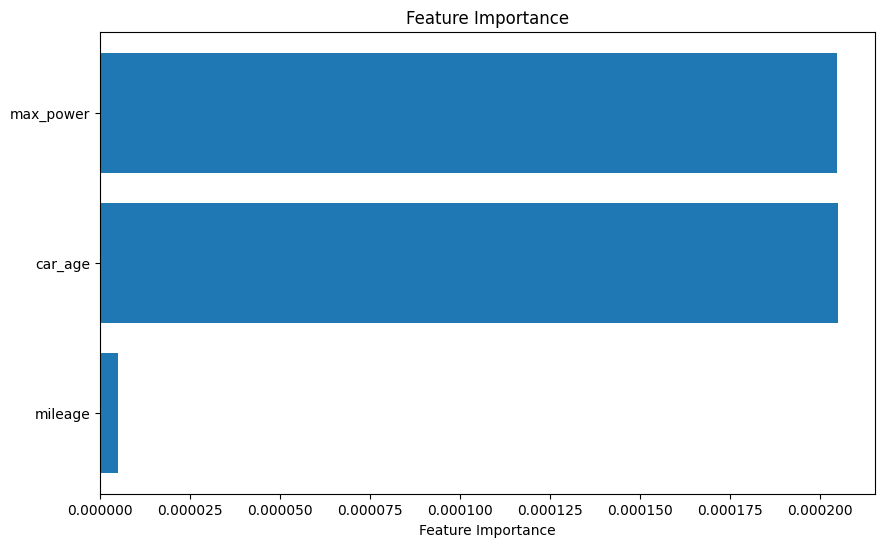

In [128]:
a2_model.plot_feature_importance(X)

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [124]:
# Original Data
df_org[['max_power','year','mileage','selling_price']].loc[10]

max_power           108.45
year               2014.00
mileage              19.01
selling_price    500000.00
Name: 10, dtype: float64

In [125]:
# After scaling
df[['max_power', 'year', 'mileage','selling_price']].loc[10]

max_power           108.45
year               2014.00
mileage              19.01
selling_price    500000.00
Name: 10, dtype: float64

In [137]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
model = loaded_model['model']
scaler = loaded_model['scaler']


# Prepare for Random testing values
from datetime import datetime

var_car_age = (datetime.now().year) - 2014

sample = np.array([[108.45, var_car_age, 19.01]]) 
sample = scaler.transform(sample)
sample


# Export predicted value
predict_car_price = model.predict(sample)
predict_car_price,np.exp(predict_car_price)


(array([0.17227166]), array([1.18800052]))

***Summary***

After experimenting with various parameters and methods, it is evident that the model's performance in terms of Mean Squared Error (MSE) and R2 score has not shown significant improvement. This indicates that the current model may not be suitable for the task, and it might be necessary to reevaluate the entire modeling process.

Upon analyzing the MLflow logs, the most promising algorithm and parameters have been identified:

Algorithm : Lasso
Method : sto
Learning rate : 0.0001
Weight initialization : zeros
Use momemtum : 0.5

![Alt text](image.png)
![Alt text](image-4.png)

**Conclusion**

In the deployment phase, I encountered an issue with my web application. While it functions correctly on my locally built Docker image, it fails to operate as expected on the remote server. This assignment has highlighted the importance of continuous effort and the need for further study and exploration to overcome such challenges.